# German Credit Risk Modelling
A complete End to End Default Prediction Workflow

# Step B – Exploratory Data Analysis (EDA)

With a clean dataset prepared, this section explores the German Credit data to uncover patterns, spot anomalies, and form hypotheses for modeling.  
We combine visualizations and statistical checks to better understand variable relationships and the drivers of default risk.

**Key tasks in this step**
- Gain familiarity with distributions of numeric and categorical features (histograms, boxplots, countplots).
- Examine relationships between predictors and the target variable (correlations, group statistics, cross-tabs).
- Detect outliers or unusual patterns that may influence modeling.
- Explore feature interactions and potential multicollinearity.
- Generate summary statistics to inform feature engineering and model selection.

> **Goal:** Build a deep understanding of the data so that feature engineering and model design are guided by evidence rather than guesswork.


## Data Understanding and Cleaning
Describe whats in dataset and Cleaning Of Data

## 1. Distribution Of Target Variable(After Resampling)

In [ ]:
from google.colab import files

uploadedData = files.upload()

Saving processed_credit_data.csv to processed_credit_data (5).csv
Saving processed_credit_data_scaled.csv to processed_credit_data_scaled (2).csv


In [ ]:
import pandas as pd

data = pd.read_csv("processed_credit_data.csv")
X = data.drop("target", axis=1)
Y = data["target"]

dataScaled = pd.read_csv("processed_credit_data.csv")
X_Scaled = dataScaled.drop("target", axis=1)

In [ ]:
X_Scaled

,Checking Account,Duration,Credit History,Purpose,Credit Amount,Savings Account,Present Employment Since,Installment Rate,Personal Status and Sex,Other Debtors,...,Property,Age,Other Installment Plans,Housing,Existing Credits,Job,Liable Maintaince Provider,Telephone,Foreign_Worker,Target
0,0,6,4,4,1169,4,4,4,2,0,...,0,67,2,1,2,2,1,1,0,NaN
1,1,48,2,4,5951,0,2,2,1,0,...,0,22,2,1,1,2,1,0,0,NaN
2,3,12,4,7,2096,0,3,2,2,0,...,0,49,2,1,1,1,2,0,0,NaN
3,0,42,2,3,7882,0,3,2,2,2,...,1,45,2,2,1,2,2,0,0,NaN
4,0,24,3,0,4870,0,2,3,2,0,...,3,53,2,2,2,2,2,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,12,2,3,1736,0,3,3,1,0,...,0,31,2,1,1,1,1,0,0,NaN
996,0,30,2,1,3857,0,2,4,0,0,...,1,40,2,1,1,3,1,1,0,NaN
997,3,12,2,4,804,0,4,4,2,0,...,2,38,2,1,1,2,1,0,0,NaN
998,0,45,2,4,1845,0,2,4,2,0,...,3,23,2,2,1,2,1,1,0,NaN


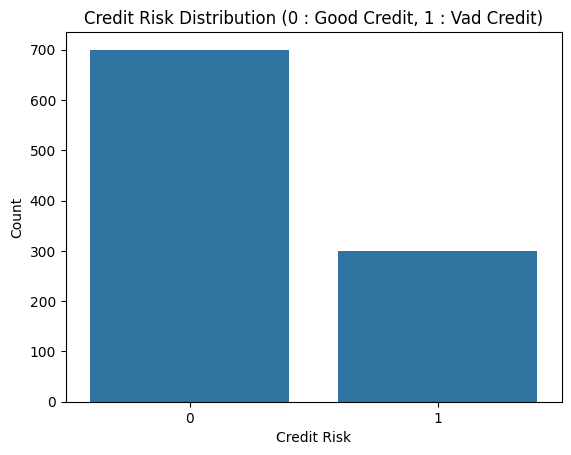

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=Y)
plt.title("Credit Risk Distribution (0 : Good Credit, 1 : Vad Credit)")
plt.xlabel("Credit Risk")
plt.ylabel("Count")
plt.show()

## 2. Correlation HeatMap

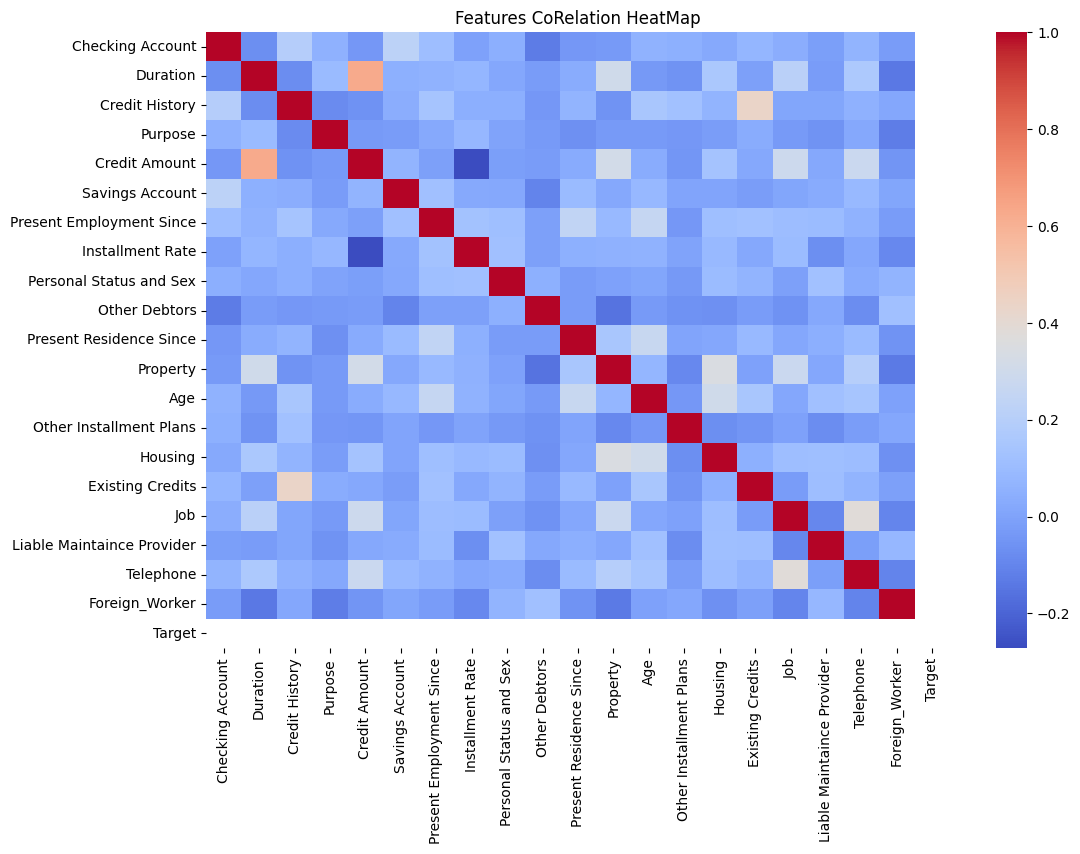

In [ ]:
corr = pd.DataFrame(X_Scaled, columns=X.columns).corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap="coolwarm")
plt.title("Features CoRelation HeatMap")
plt.show()

## 3. Feature Distributions

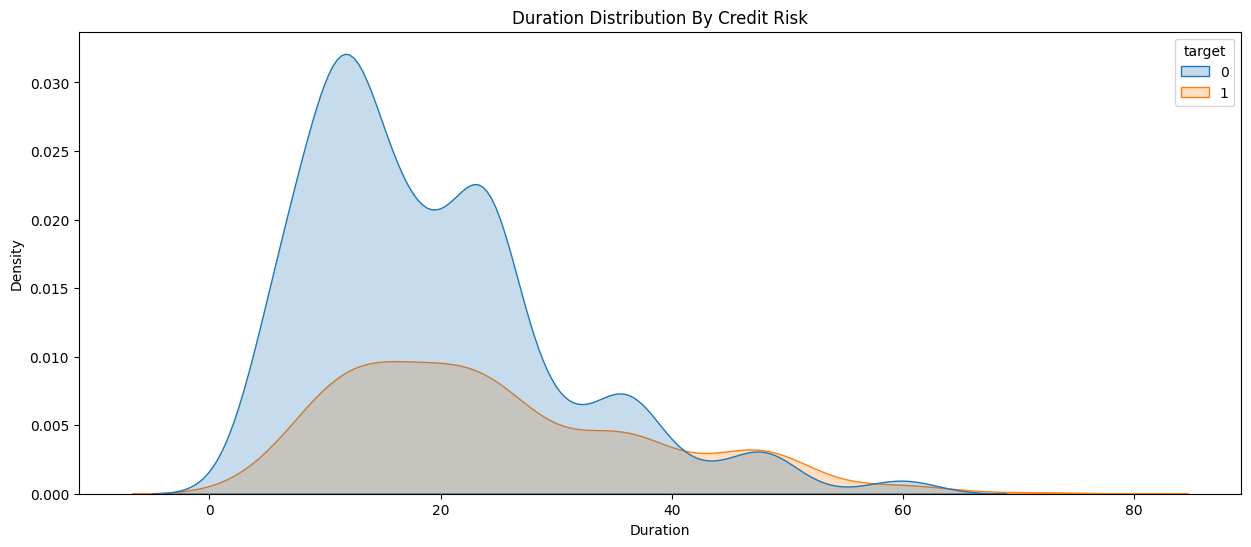

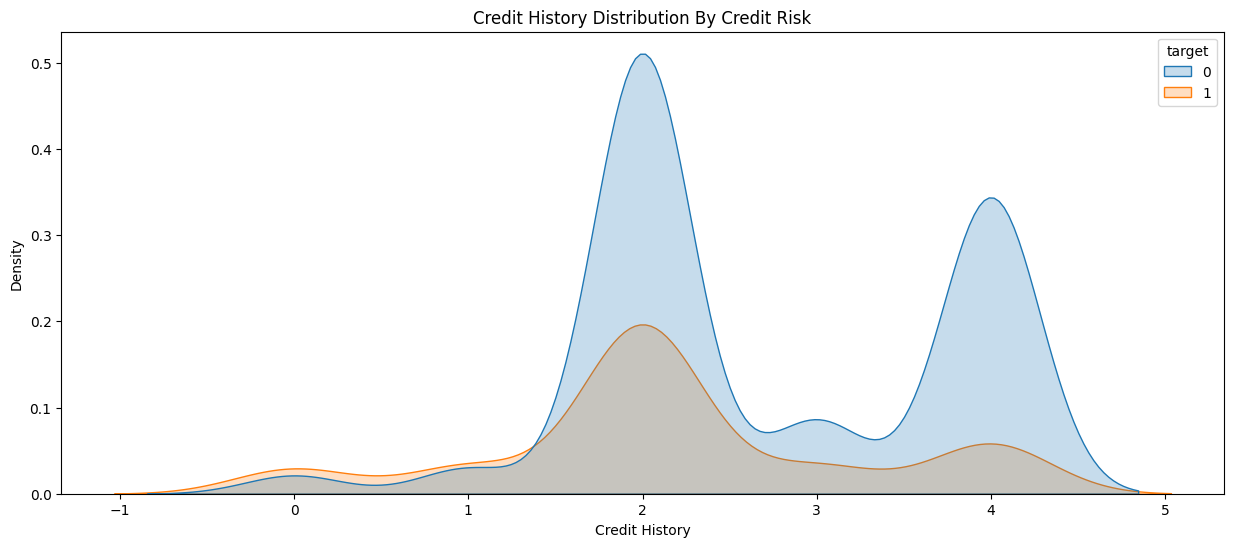

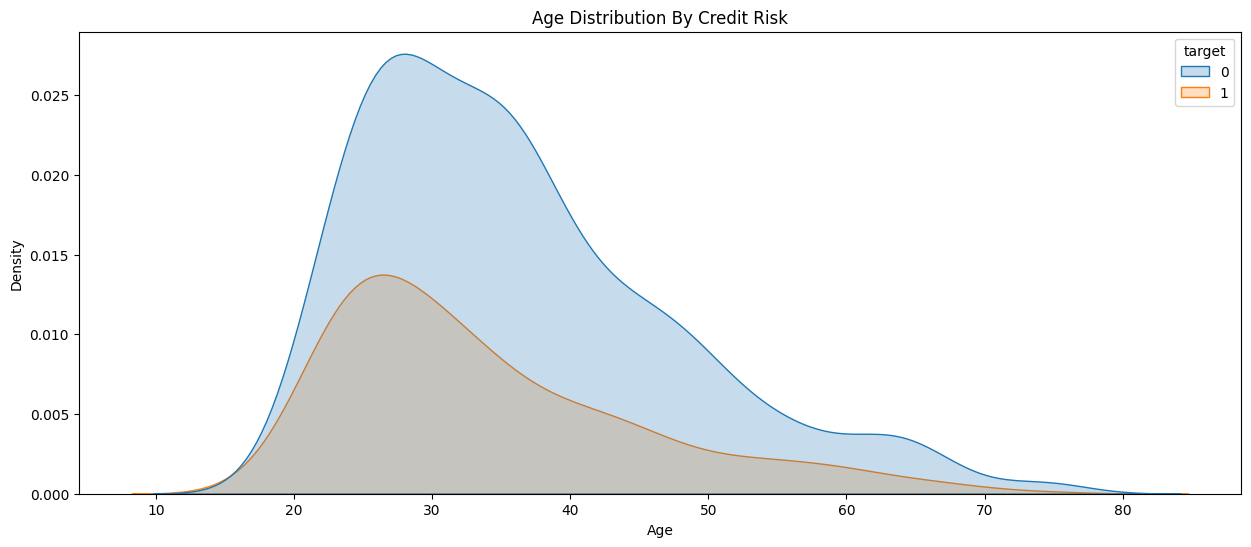

In [ ]:
numCols = ["Duration", "Credit History", "Age"]

for col in numCols:
  plt.figure(figsize=(15,6))
  sns.kdeplot(x=X[col], hue=Y, fill=True)
  plt.title(f"{col} Distribution By Credit Risk")
  plt.show()

## 4. Feature Importance(Using Random Forest)
Even Before Modelling, we use quick Random Forest to see which features matter

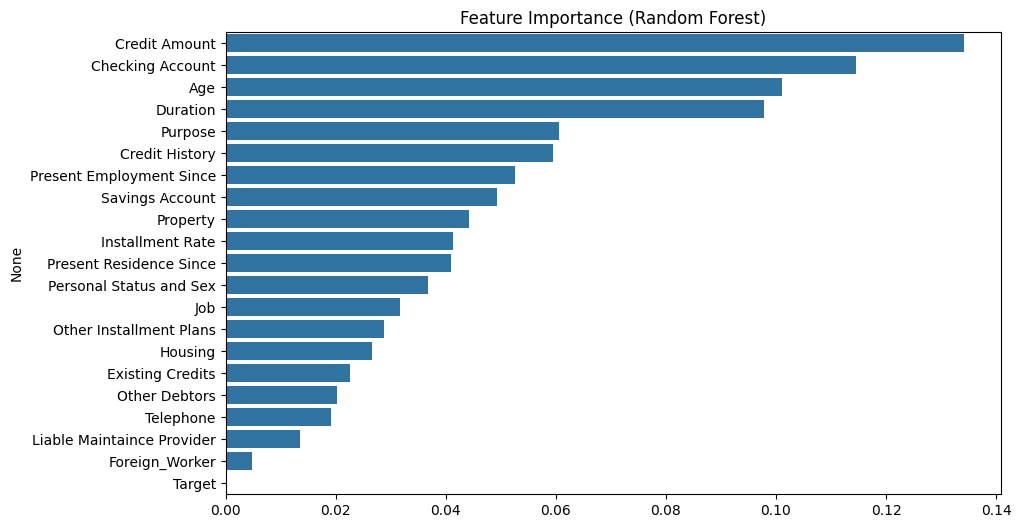

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

rf = RandomForestClassifier(n_estimators = 200, random_state = 42)
rf.fit(X_Scaled, Y)

imps = rf.feature_importances_
indices = np.argsort(imps)[::-1]

plt.figure(figsize=(10,6))
sns.barplot(x=imps[indices], y=X.columns[indices])
plt.title("Feature Importance (Random Forest)")
plt.show()

## Step B – Exploratory Data Analysis: Summary

### 1. Target Distribution

Dataset is moderately imbalanced – ~70 % “Good” loans vs. ~30 % “Bad” loans.

Business Insight: Mirrors real lending portfolios where most borrowers repay. Detecting the high-risk minority is key to limiting credit losses.

### 2. Correlation Analysis

Loan duration ↔ Credit amount shows a strong positive relationship – bigger loans typically mean longer repayment terms.

Other numeric features have low pairwise correlation, indicating minimal multicollinearity and a healthy foundation for modeling.

### 3. Numerical Feature Distributions

Bad loans cluster around higher credit amounts and longer durations.

Good loans are concentrated at smaller amounts and shorter terms.

### 4. Categorical Feature Impact

Checking-account status is highly predictive: applicants with “< 0 DM” balances default far more often.

Credit history matters: prior delays/defaults increase risk.

Purpose categories (e.g., car, business, furniture) reveal distinct risk profiles.

### 5. Feature Importance (Random-Forest Baseline)

Top drivers of default risk:

Checking-account status

Loan duration

Credit amount

Savings-account status

Credit history

> **Business Insight** : Aligns with domain intuition—repayment ability is tied to available balances, requested amount, and past repayment behavior.

## Final TakeAway For Step B
EDA reveals that financial health indicators (checking/savings accounts) and loan details (amount, duration) are the most important risk drivers.